# EDA on New York Power Plants Data

In [12]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [14]:
%%R

require('tidyverse')
require('DescTools')

In [40]:
df = pd.read_csv('grants_merged_plants_eji.csv')
df.head()

,Unnamed: 0.2,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,GEOID_2020,COUNTY_x,StateDesc,STATEABBR,...,State_y,Assistance Listing,Program,Investment Category,Website Url,Announcement Url,Data Extract Date,STATE_y,COUNTY,TRACT_y
0,0,1,1,20804,140000US01001020804,1001020804,1001020804,Autauga County,Alabama,AL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,3,10706,140000US01003010706,1003010706,1003010706,Baldwin County,Alabama,AL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1,3,11503,140000US01003011503,1003011503,1003011503,Baldwin County,Alabama,AL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1,3,11604,140000US01003011604,1003011604,1003011604,Baldwin County,Alabama,AL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1,5,950100,140000US01005950100,1005950100,1005950100,Barbour County,Alabama,AL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
df.shape

(90906, 222)

In [42]:
df['plant_name'].nunique()

9230

In [43]:
df[df['StateDesc'] == 'New York'].size

1285602

In [44]:
ny = df[df['StateDesc'] == 'New York']

In [45]:
ny.to_csv('ny.csv')

In [46]:
%%R
 
# Import data with R
df <- read_csv('ny.csv', show_col_types = FALSE)
df

New names:
• `` -> `...1`
# A tibble: 5,791 × 223
    ...1 `Unnamed: 0.2` STATEFP COUNTYFP TRACTCE AFFGEOID       GEOID GEOID_2020
   <dbl>          <dbl>   <dbl>    <dbl>   <dbl> <chr>          <dbl>      <dbl>
 1 46645          46645      36        1     100 140000US360… 3.60e10    3.60e10
 2 46646          46646      36        1    1902 140000US360… 3.60e10    3.60e10
 3 46647          46647      36        1    2000 140000US360… 3.60e10    3.60e10
 4 46648          46648      36        3  950500 140000US360… 3.60e10    3.60e10
 5 46649          46649      36        3  950700 140000US360… 3.60e10    3.60e10
 6 46650          46650      36        5    5100 140000US360… 3.60e10    3.60e10
 7 47204          47204      36        5    7300 140000US360… 3.60e10    3.60e10
 8 47205          47205      36        5    7700 140000US360… 3.60e10    3.60e10
 9 47206          47206      36        5    8500 140000US360… 3.60e10    3.60e10
10 47207          47207      36        5   15700 140000US36

`geom_smooth()` using formula = 'y ~ x'


R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 128 rows containing non-finite outside the scale range
(`stat_smooth()`). 

R[write to console]: 2: Removed 128 rows containing missing values or values outside the scale range
(`geom_point()`). 



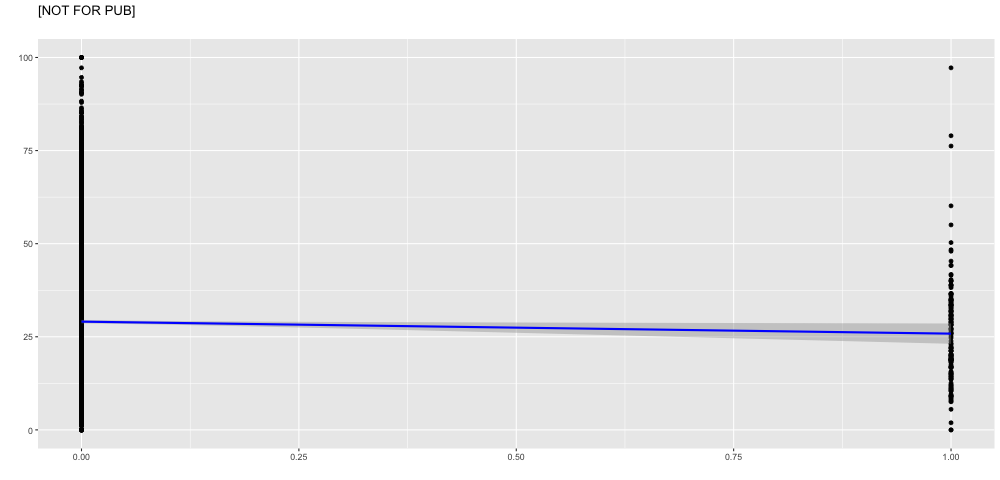

In [47]:
%%R -w 1000

ggplot(df) +
    aes(x=fossil_fuels, y=E_POV200) +
    geom_point() +
    geom_smooth(method="lm", se=TRUE, color="blue") +
    labs(title=str_wrap("[NOT FOR PUB] ", width=75), 
         subtitle="", x="", y="")


R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 128 rows containing missing values or values outside the scale range
(`geom_point()`). 



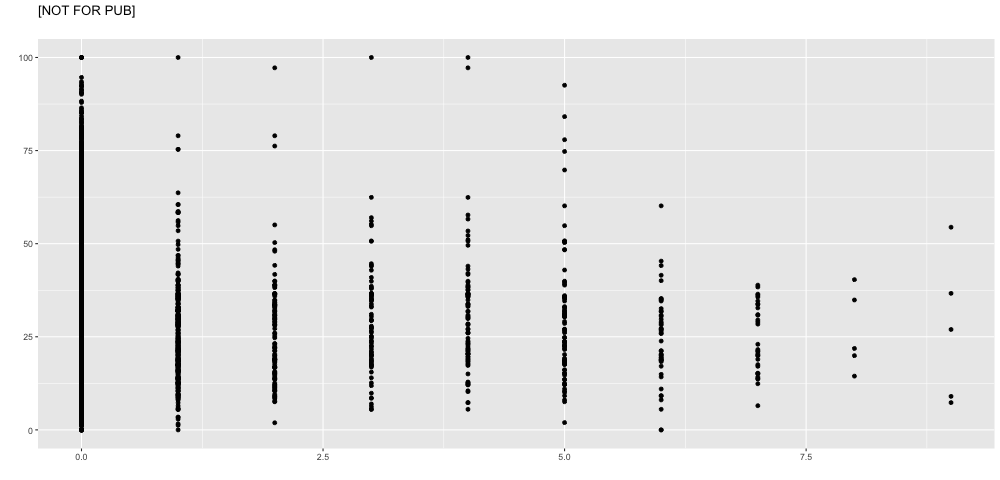

In [48]:
%%R -w 1000

ggplot(df) +
    aes(x=Category_Number, y=E_POV200) +
    geom_point() +
    labs(title=str_wrap("[NOT FOR PUB] ", width=75), 
         subtitle="", x="", y="")


In [49]:
%%R

library(dplyr)

df %>%
  group_by(Category_Number) %>%
  summarise(median_E_UNINSUR = median(E_UNINSUR, na.rm = TRUE))

# A tibble: 10 × 2
   Category_Number median_E_UNINSUR
             <dbl>            <dbl>
 1               0             4   
 2               1             3.7 
 3               2             3.85
 4               3             4   
 5               4             4.5 
 6               5             3.9 
 7               6             4.2 
 8               7             3.25
 9               8             3.2 
10               9             2.5 


In [50]:
%%R

library(dplyr)

df %>%
  group_by(Category_Number) %>%
  summarise(median_AFAM = median(E_AFAM, na.rm = TRUE))

# A tibble: 10 × 2
   Category_Number median_AFAM
             <dbl>       <dbl>
 1               0        4.5 
 2               1        1.95
 3               2        2.2 
 4               3        2.1 
 5               4        1.55
 6               5        1.2 
 7               6        1.1 
 8               7        0.5 
 9               8        0.9 
10               9        4   


In [51]:
%%R

df %>%
  group_by(Category_Number) %>%
  summarise(median_E_POV200 = median(E_POV200, na.rm = TRUE))

# A tibble: 10 × 2
   Category_Number median_E_POV200
             <dbl>           <dbl>
 1               0            25.8
 2               1            26.4
 3               2            24.7
 4               3            27.5
 5               4            29.9
 6               5            27.8
 7               6            25.9
 8               7            21.4
 9               8            21.9
10               9            27.0


In [52]:
%%R

df %>%
  group_by(Category_Number) %>%
  summarise(median_E_CANCER = median(E_CANCER, na.rm = TRUE))

# A tibble: 10 × 2
   Category_Number median_E_CANCER
             <dbl>           <dbl>
 1               0            7.1 
 2               1            9.3 
 3               2            9.4 
 4               3            8.7 
 5               4            9.3 
 6               5            9   
 7               6            9   
 8               7            9.65
 9               8            8.9 
10               9            8.2 


In [53]:
%%R

df %>%
  group_by(Category_Number) %>%
  summarise(median_E_IMPWTR = median(E_IMPWTR, na.rm = TRUE))

# A tibble: 10 × 2
   Category_Number median_E_IMPWTR
             <dbl>           <dbl>
 1               0          0.67  
 2               1          0.199 
 3               2          0.178 
 4               3          0.186 
 5               4          0.182 
 6               5          0.188 
 7               6          0.125 
 8               7          0.0705
 9               8          0.023 
10               9          0.017 


In [54]:
%%R

df %>%
  group_by(Category_Number) %>%
  summarise(median_ASTHMA = median(E_ASTHMA, na.rm = TRUE))

# A tibble: 10 × 2
   Category_Number median_ASTHMA
             <dbl>         <dbl>
 1               0          10.4
 2               1          11  
 3               2          10.8
 4               3          11  
 5               4          11  
 6               5          11.1
 7               6          10.9
 8               7          10.8
 9               8          10.9
10               9          11  


In [ ]:
%%R

df %>%
  group_by(Category_Number) %>%
  summarise(median_discharge_volume_million_gallons = median(discharge_volume_million_gallons, na.rm = TRUE)) %>%
    arrange(desc(median_discharge_volume_million_gallons))

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 111 rows containing missing values or values outside the scale range
(`geom_point()`). 



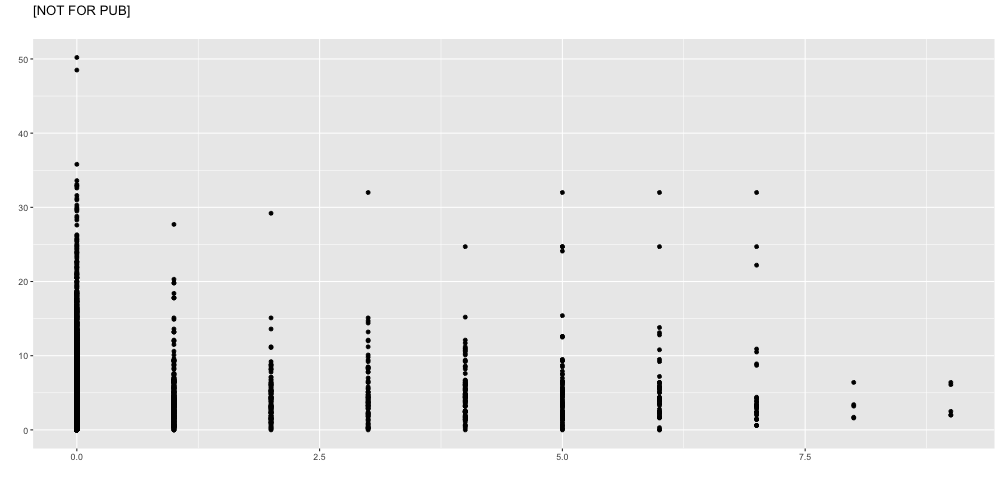

In [56]:
%%R -w 1000

ggplot(df) +
    aes(x=`Category_Number`, y=E_UNINSUR) +
    geom_point() +
    labs(title=str_wrap("[NOT FOR PUB] ", width=75), 
         subtitle="", x="", y="")


In [57]:
%%R
# Load the package
library(nnet)

# Convert the outcome to a factor
df$Category_Number <- as.factor(df$Category_Number)

# Fit the multinomial logistic regression model
multi_logit <- multinom(Category_Number ~ E_POV200 + E_UNINSUR + AFAM + E_IMPWTR + E_CANCER + E_CHD, data = df)

# View the summary
summary(multi_logit)

# weights:  80 (63 variable)
initial  value 13005.000605 
iter  10 value 6105.126597
iter  20 value 5661.396385
iter  30 value 5296.437530
iter  40 value 4775.601183
iter  50 value 3983.582398
iter  60 value 3654.775589
iter  70 value 3554.707952
iter  80 value 3544.170377
iter  90 value 3537.203514
iter 100 value 3521.064459
final  value 3521.064459 
stopped after 100 iterations
Call:
multinom(formula = Category_Number ~ E_POV200 + E_UNINSUR + AFAM + 
    E_IMPWTR + E_CANCER + E_CHD, data = df)

Coefficients:
  (Intercept)     E_POV200    E_UNINSUR          AFAM   E_IMPWTR    E_CANCER
1   -3.098448  0.010955637 -0.033578322 -4.966085e-04  -1.443429  0.14194507
2   -5.591943  0.012307065 -0.007419607 -8.135314e-05  -1.599734  0.23541585
3   -4.751380  0.016235385  0.011014277 -2.056811e-04  -1.679415  0.12491416
4   -7.071360  0.035643483  0.032944060  2.578165e-05  -1.709453  0.40154661
5   -5.783095  0.025491034  0.025333996 -2.813784e-04  -1.586114  0.21643811
6   -4.631624 -0.01274

In [58]:
%%R

z <- summary(multi_logit)$coefficients / summary(multi_logit)$standard.errors
p <- 2 * (1 - pnorm(abs(z)))
p

   (Intercept)   E_POV200  E_UNINSUR         AFAM     E_IMPWTR     E_CANCER
1 0.000000e+00 0.06763095 0.02956838 0.0008362309 0.000000e+00 0.0059162404
2 0.000000e+00 0.25725455 0.78321903 0.7150260374 9.001340e-07 0.0073499844
3 5.889533e-11 0.18291006 0.66705316 0.3965351621 3.319281e-06 0.2471685870
4 0.000000e+00 0.00221109 0.14728126 0.9112398863 1.695870e-06 0.0000331991
5 0.000000e+00 0.02100870 0.26046522 0.2846190033 5.226998e-06 0.0220657761
6 3.527135e-07 0.43997928 0.17791434 0.3090936266 5.280161e-05 0.8109852024
7 0.000000e+00 0.66529666 0.04561367 0.0334397890 9.139276e-04 0.0509703794
8 0.000000e+00 0.96127301 0.47850491 0.4876878952 0.000000e+00 0.1827394658
9 0.000000e+00 0.53275723 0.09981358 0.9321787976 0.000000e+00 0.6849941792
       E_CHD
1 0.76411067
2 0.71366803
3 0.95449267
4 0.36029723
5 0.94993445
6 0.36514433
7 0.77356875
8 0.54383142
9 0.05292351


In [59]:
%%R

odds_ratios <- exp(coef(multi_logit))

In [60]:
%%R
odds_ratios

   (Intercept)  E_POV200 E_UNINSUR      AFAM     E_IMPWTR  E_CANCER     E_CHD
1 0.0451191875 1.0110159 0.9669792 0.9995035 2.361168e-01 1.1525133 1.0184538
2 0.0037277761 1.0123831 0.9926079 0.9999187 2.019503e-01 1.2654349 1.0346703
3 0.0086397679 1.0163679 1.0110752 0.9997943 1.864831e-01 1.1330512 0.9928444
4 0.0008490779 1.0362863 1.0334927 1.0000258 1.809648e-01 1.4941338 0.9051077
5 0.0030791708 1.0258187 1.0256576 0.9997187 2.047196e-01 1.2416462 0.9938674
6 0.0097389321 0.9873335 1.0401618 0.9996145 1.310600e-01 1.0309575 1.1303919
7 0.0023837948 0.9911344 1.0616231 0.9956952 1.174006e-01 1.2522918 1.0539877
8 0.0015577149 1.0035813 0.8228072 0.9945874 5.692751e-10 1.8549375 0.6183034
9 0.0018250069 0.9744548 0.6954991 1.0000864 1.371819e-02 0.9480102 1.5003098


### E_CANCER has a significant positive effect across most models 